In [12]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
dx = 0.01
dt = 0.01
hcut = 1
m = 1

l = (hcut*dt)/(2*m*dx*dx)
print(l)

def v(arr,m_wells,p1,w,s,v1,l1):
    result = []
    for r in arr:
        for i in range(m_wells):
            if r > (p1 + i*(w + s)) and r <(p1 + (i+1)*w + i*s):
                val = v1  
            elif r >= (p1 + (i+1)*w + i*s) and r <= ( p1 + i*(w+s)):
                val = 0 
            elif r>= -l1 and r <= p1:
                val = 0 
            elif r>= (p1 + i*(w+s)) and r<= l1:
                val = 0  
        result.append(val)
    return result



x = np.round(np.arange(-10,10+dx,dx),2)
v_x = np.array(v(x,1,-1,0.1,0,100,100))
print(len(x))
main_diag_A = 1 + 1j*l + (1j*dt/(2*hcut))*v_x
off_diag_A = (-0.5j*l)*np.ones(len(x)-1)
diagA = diags([off_diag_A, main_diag_A, off_diag_A], offsets=[-1,0,1])

main_diag_B = 1 - 1j*l - (1j*dt/(2*hcut))*v_x
off_diag_B = (0.5j*l)*np.ones(len(x)-1)
diagB = diags([off_diag_B, main_diag_B, off_diag_B], offsets=[-1,0,1])

mean = -5
std = 1
k0 = 10

psi0 = (1/(np.sqrt(2*np.pi)*std)) * np.exp(-0.5*((x-mean)/std)**2) * np.exp(1j*np.sqrt(k0)*x)
psi_current = psi0.copy()

snapshots = []
times = []

for i in range(250):
    d = diagB @ psi_current
    psi_current = spsolve(diagA, d)

    snapshots.append(psi_current.copy())
    times.append((i + 1) * dt)




50.0
2001


C:\Users\SOUNAK\AppData\Local\Temp\ipykernel_12120\963314869.py:53: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  psi_current = spsolve(diagA, d)


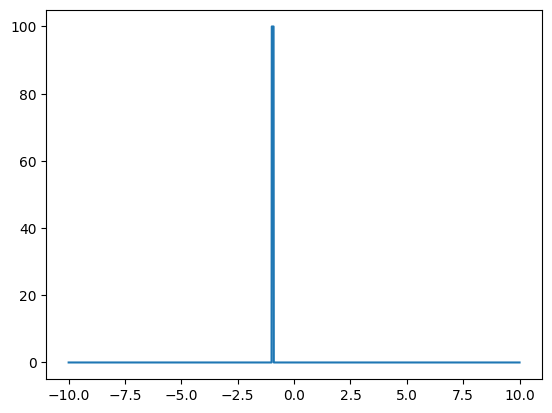

In [13]:
plt.plot(x,v_x)
plt.show()

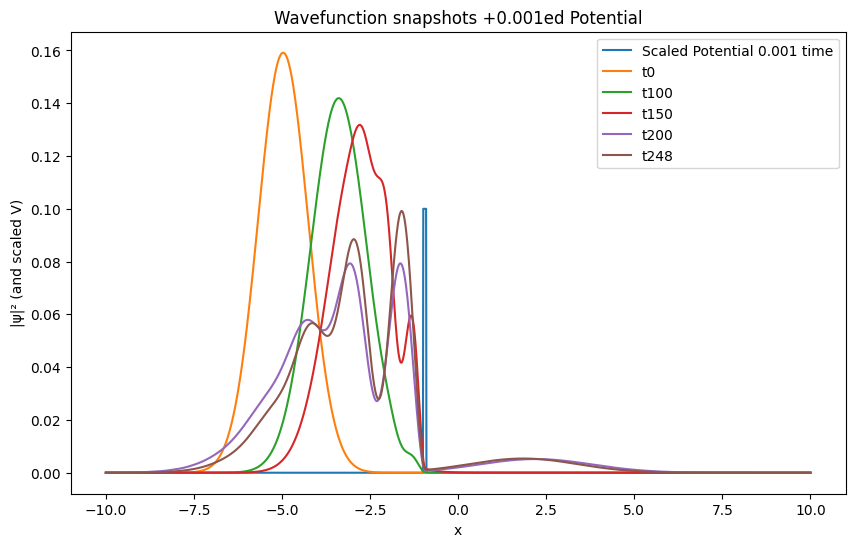

In [16]:
plt.figure(figsize=(10,6))


scale = 0.001
plt.plot(x, scale * v_x, label=f"Scaled Potential {scale} time")

plt.plot(x, np.abs(snapshots[0])**2, label="t0")
plt.plot(x, np.abs(snapshots[50])**2, label="t100")
plt.plot(x, np.abs(snapshots[70])**2, label="t150")
plt.plot(x, np.abs(snapshots[210])**2, label="t200")
plt.plot(x, np.abs(snapshots[200])**2, label="t248")

plt.xlabel("x")
plt.ylabel("|ψ|² (and scaled V)")
plt.title(f"Wavefunction snapshots +{scale}ed Potential")
plt.legend()
plt.show()
